# En attendant Euler

## Énoncé du problème

Pour parler mathématique, l’objectif de cet exercice est de représenter une fonction de distribution cumulative des nombres premiers. Plus simplement, nous souhaitons tracer un diagramme qui représente la quantité de nombres premiers pour chaque membre d’une série d’entiers.

Par exemple, si l’on souhaite représenter la distribution cumulative des nombres premiers pour les entiers de 2 à 100, la fonction devrait afficher le diagramme suivant :

![Distribution cumulative des nombres premiers dans la série 2-100](../images/primes.png)

Sur l’axe des abscisses $x$, nous listons les entiers de 2 à 100. Et sur l’axe des ordonnées $y$, nous pointons la quantité de nombres premiers pour la série donnée en abscisses :
- 4 pour la série de 2 à 10 ;
- 8 pour la série de 2 à 20 ;
- …
- 25 pour la série de 2 à 100.

## Observations

Avant d’effectuer la première observation sur ces données, rappelons que :
1. est nombre premier tout entier naturel divisible, au sens d’une division euclidienne (ou division entière) sans reste, par exactement deux entiers naturels : 1 ou lui-même ;
2. une division euclidienne aboutit à ne manipuler que des entiers (ex. : $10 \div 3 = 3 \times 3 + 1$).

Alors, pourquoi commencer la série au nombre 2 et pas à 0 ? Si l’on commençait la série à 0, cela reviendrait à autoriser une division par 0 ou 1. Pour la première, c’est impossible : la division par zéro est indéfinie ; pour la seconde, ça n’a pas plus de sens dans le cas de la définition des nombres premiers, car 1 n’est divisible que par un seul entier naturel.

La deuxième observation, que nous laisserons de côté, s’attache à la figure en escaliers qui se dessine avec l’impression que les paliers s’étirent à mesure que l’on se dirige vers le dernier terme de la série. C’est une caractéristique des nombres premiers : s’il en existe bien une infinité, ils se raréfient à mesure que l’on monte dans les grands nombres. Très facile à vérifier :
- entre 0 et 100, on en dénombre 25 ;
- entre 1000 et 1100, plus que 16 ;
- entre 1 000 000 et 1 000 100, seulement 6.

De manière anecdotique, nous pouvons remarquer pour terminer qu’aucune régularité ne se dégage dans les formes dessinées par la distribution.

## Dénicher un nombre premier

Prenons l’énoncé différemment. Si un nombre premier n’est divisible que par 1 ou par lui-même, alors cela signifie qu’il n’est pas divisible par tout autre nombre entre 1 et lui-même.

Mettons que nous souhaitions lister tous les nombres premiers entre 0 et 10. Nous savons déjà que 0 et 1 ne sont pas des nombres premiers. Il reste à calculer successivement le rapport entre 10 et 2, 3, 4… jusqu’à 9, en utilisant la division euclidienne :
- $10 \div 2 = 2 \times 5 + 0$
- $10 \div 3 = 3 \times 3 + 1$
- $10 \div 4 = 4 \times 2 + 2$
- $10 \div 5 = 5 \times 2 + 0$
- $10 \div 6 = 6 \times 1 + 4$
- $10 \div 7 = 7 \times 1 + 3$
- $10 \div 8 = 8 \times 1 + 2$
- $10 \div 9 = 9 \times 1 + 1$

Pour savoir si 10 est divisible par l’un des entiers de cette série, il suffit de repérer les opérations où le reste de la division est égale à 0. C’est le cas pour les divisions par 2 et 5. Selon la définition des nombres premiers, 10 n’est pas un nombre premier.

Répétez la méthode avec le nombre 7, vous devriez en déduire qu’il s’agit d’un nombre premier.

## Recenser les nombres premiers dans une série

La réponse n’est pas de savoir combien il y a de nombres premiers dans la série *Game of Thrones*, mais plutôt dans une série mathématique. C’est en fait la question la plus simple à partir du moment où l’on a su répondre à la précédente. Dans l’exemple précédent, nous avons trouvé que 10 n’était pas un nombre premier et vous avez également calculé que 7 l’était. Ces résultats nous amènent à formuler deux hypothèses :
1. Si 7 est un nombre premier, alors il y a au moins un nombre premier dans la série 0-7.
2. Si 7 est un nombre premier et que 10 n’en est pas un, il y a au moins un nombre premier dans la série 0-10.

Si nous cherchons maintenant tous les nombres premiers pour tous les nombres de la série 0-10, on obtient :
- $0 = \emptyset$
- $1 = \emptyset$
- $2 = [2]$
- $3 = [2, 3]$
- $4 = [2, 3]$
- $5 = [2, 3, 5]$
- $6 = [2, 3, 5]$
- $7 = [2, 3, 5, 7]$
- $8 = [2, 3, 5, 7]$
- $9 = [2, 3, 5, 7]$
- $10 = [2, 3, 5, 7]$

On sait à présent combien de nombres premiers il existe pour chaque série entre 0 et 10. Si l’on devait coder ces résultats en Python, on adopterait une structure de type liste de tuples. Pour chaque borne supérieure d’une série est associée la quantité de nombres premiers que l’on recense (3 nombres premiers pour 6, 2 nombres premiers pour 4…).
```python
data = [
    (2, 1),
    (3, 2),
    (4, 2),
    (5, 3),
    (6, 3),
    (7, 4),
    (8, 4),
    (9, 4),
    (10, 4)
]
```

Le nombre d’opérations est encore assez limité lorsque le but est de recenser les nombres premiers dans les séries jusqu’à 10. Quid des séries jusqu’à 100 ? Jusqu’à 1000 ? Eh bien, il faudrait effectuer $n-1$ divisions, ce qui prendrait un temps conséquent. Heureusement, beaucoup de ces opérations sont inutiles. Une règle mathématique permet d’établir la liste des diviseurs d’un nombre :

$1 \lt div \leq \sqrt n$

Si l’on applique cette règle pour trouver la liste des diviseurs du nombre 257 à tester, on obtient la liste des nombres de 2 à 16 :

$1 \lt div \leq \sqrt 257$

17 opérations au lieu de 256 ($n-1$), c’est bien plus économique !

## Une fonction pour la représentation

La fonction ci-dessous produit un diagramme qui affiche la distribution cumulative des nombres premiers :

In [1]:
import matplotlib.pyplot

def prime_cumulative_distribution(data):
    """Prints the cumulative distribution of primes.
    
    data -- list of number of primes in 0-n
    """

    # x = series of numbers
    # y = nb of primes in a serie
    x, y = [], []
    
    for serie, nb in data:
        x.append(serie)
        y.append(nb)

    matplotlib.pyplot.plot(x, y)
    matplotlib.pyplot.ylabel('Quantité de nombres premiers')
    matplotlib.pyplot.xlabel('Série')
    matplotlib.pyplot.show()

Il ne reste plus qu’à lui transmettre la variable `data` afin de tester son fonctionnement :

In [ ]:
data = [(2, 1), (3, 2), (4, 2), (5, 3), (6, 3), (7, 4), (8, 4), (9, 4), (10, 4)]
prime_cumulative_distribution(data)

## À vous !

Sachant que vous avez à disposition la fonction qui affiche la distribution cumulative, il vous reste à programmer les fonctions qui produiront les données, à savoir une liste de tuples.

Quelques petites astuces supplémentaires :
- pensez à l’opérateur modulo `%` qui renvoie le reste d’une division euclidienne ;
- comparer un nombe à la racine carrée d’un autre nombre revient à lui comparer son carré.  
$1 \lt a \leq \sqrt b \equiv 1 \lt a^2 \leq b$

Pour vous aider, n’hésitez pas à vous servir du squelette des fonctions ci-dessous :

In [6]:
def is_prime(n):
    """Returns a boolean whether
    the number is prime or not.
    
    n -- the number to test
    """
    # List of dividers to test begins at 2
    i = 2

    # While the square of the divider is lower or equal to n
    # and there is still a remainder after the division of n by
    # the current divider…
    while i * i <= n and n % i:
        # … we try with a greater divider
        i += 1

    # The loop shall stop for two reasons:
    # - square divider is greater than the number
    # and there is no need to go on;
    # - there is no remainder after a division.
    # So we check the current divider (i) to
    # determine if it's a prime or not.
    if i * i > n and n > 1: return True
    else: return False

In [7]:
def nb_primes(n):
    """For a given number, returns
    the number of primes in the serie 2 to n.
    
    n -- upper limit of a serie
    """
    counter = 0
    for i in range(2, n + 1):
        if is_prime(i):
            counter += 1
    return counter

In [8]:
def primes_distribution(to):
    """Cumulative distribution function of primes.
    
    to -- upper limit of the series
    """
    primes = list()
    for i in range(2, to + 1):
        primes.append((i, nb_primes(i)))
    return primes

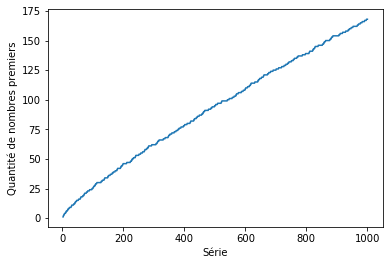

In [9]:
nb = primes_distribution(1000)
prime_cumulative_distribution(nb)